<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/lectures/module6/NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[BBC](https://www.kaggle.com/datasets/alfathterry/bbc-full-text-document-classification)

[Article](https://www.kaggle.com/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml/code)

[Telegram](https://www.kaggle.com/datasets/mexwell/telegram-spam-or-ham)

# Посібник з обробки природної мови (NLP) за допомогою NLTK у Python

Обробка природної мови (Natural Language Processing, NLP) - це підгалузь штучного інтелекту, що займається взаємодією між комп'ютером і людською мовою. Він надає комп'ютерам можливість розуміти, обробляти та генерувати людську мову. НЛП має численні застосування, серед яких

* **Аналіз настрою:** Класифікація тексту як позитивного, негативного або нейтрального.
* **Машинний переклад:** автоматичний переклад тексту з однієї мови на іншу.
* **Чат-боти:** створення розмовних агентів, які можуть взаємодіяти з користувачами.
* **Реферування тексту:** Перетворення довгого тексту на коротший, інформативний підсумок.



[Документація](https://www.nltk.org/)

NLTK, або Natural Language Toolkit, - це пакет Python, який можна використовувати для NLP.

Багато даних, які ви можете аналізувати, є неструктурованими і містять текст, що читається людиною. Перш ніж ви зможете проаналізувати ці дані програмно, вам потрібно їх попередньо обробити. У цьому підручнику ви вперше подивитеся на типи завдань з попередньої обробки тексту, які можна виконувати за допомогою NLTK, щоб бути готовими застосовувати їх у майбутніх проектах.

In [ ]:
import nltk

# Токенізація

За допомогою **токенізації** ви можете зручно розбивати текст на слова або речення. Це дозволить вам працювати з меншими фрагментами тексту, які залишаються відносно зв'язними і значущими навіть поза контекстом решти тексту. Це ваш перший крок до перетворення неструктурованих даних на структуровані, які легше аналізувати.

Аналізуючи текст, ви будете токенізувати за словами і токенізувати за реченнями. Ось що дають обидва типи токенізації:

* **Токенізація за словом:** Слова схожі на атоми природної мови. Вони є найменшою одиницею значення, яка все ще має сенс сама по собі. Токенізація тексту за словами дозволяє визначити слова, які з'являються особливо часто. Наприклад, якщо ви аналізуєте групу оголошень про роботу, то можете виявити, що слово "Python" зустрічається дуже часто. Це може свідчити про високий попит на знання Python, але вам потрібно зазирнути глибше, щоб дізнатися більше.

* **Токенізація за реченням:** Коли ви токенізуєте за реченням, ви можете проаналізувати, як ці слова співвідносяться одне з одним, і побачити більше контексту. Чи багато негативних слів навколо слова "Python", тому що менеджер з персоналу не любить Python? Чи більше термінів з області герпетології, ніж з області розробки програмного забезпечення, що свідчить про те, що ви, можливо, маєте справу з зовсім іншим видом пітона, ніж ви очікували?

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

example_string = """
Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult."""

Токенізація за реченням:

In [ ]:
sentences = sent_tokenize(example_string)

In [ ]:
type(sentences), len(sentences)

(list, 3)

In [ ]:
sentences

["\nMuad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]

In [ ]:
sentences[0]

"\nMuad'Dib learned rapidly because his first training was in how to learn."

Токенізація за словом:

In [ ]:
words = word_tokenize(example_string)

In [ ]:
len(words)

53

In [ ]:
words

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

Бачите, як "It's" розділилося на апострофі, щоб отримати "It" і "'s", але "Muad'Dib" залишилося цілим? Це сталося тому, що NLTK знає, що "It" і "'s" (скорочення від "is") - це два різних слова, тому він порахував їх окремо. Але "Muad'Dib" не є загальноприйнятим скороченням, як "It's", тому воно не було прочитане як два окремих слова і залишилося цілим.

## Фільтрування стоп-слів
**Стоп-слова** - це слова, які ви хочете ігнорувати, тому ви відфільтровуєте їх з тексту під час обробки. Дуже поширені слова, такі як "in", "is" та "an", часто використовуються як стоп-слова, оскільки самі по собі вони не додають багато сенсу до тексту.

Ось як імпортувати відповідні частини NLTK, щоб відфільтрувати стоп-слова:

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
sentence = sentences[0]
sentence

"\nMuad'Dib learned rapidly because his first training was in how to learn."

In [ ]:
words = word_tokenize(sentence)
words

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.']

Позбуваємось пунктуації

In [ ]:
import string

words = [word for word in words if word not in string.punctuation]
words

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn']

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Позбуваємось стоп-слів

In [ ]:
filtered_words = [word for word in words if word.lower() not in stop_words]
filtered_words

["Muad'Dib", 'learned', 'rapidly', 'first', 'training', 'learn']

# Стемінг
**Стемінг** - це завдання з обробки тексту, за допомогою якого ви скорочуєте слова до їхнього кореня, який є основною частиною слова. Наприклад, слова "ліс" та "лісник" мають спільний корінь "ліс". Стеммінг дозволяє вам зосередитися на основному значенні слова, а не на всіх деталях його використання. У NLTK є кілька стеммерів, але ви використовуватимете PorterStemmer.

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [ ]:
stemmed_words = [stemmer.stem(word) for word in filtered_words]
stemmed_words

["muad'dib", 'learn', 'rapidli', 'first', 'train', 'learn']

Іншим, більш **агресивним,** алгоритмом стеммерів є **SnowballStemmer**

In [ ]:
from nltk.stem.snowball import SnowballStemmer


snowball_stemmer = SnowballStemmer(language='english')

[snowball_stemmer.stem(word) for word in filtered_words]

["muad'dib", 'learn', 'rapid', 'first', 'train', 'learn']

#Лематизація
Тепер, коли ви розібралися з частинами мови, можна повернутися до лематизації. Як і стеммінг, **лематизація** скорочує слова до їхнього основного значення, але в результаті ви отримаєте повне англійське слово, яке має сенс саме по собі, а не просто фрагмент слова, як-от "repidli".

*Примітка: **лема** - це слово, яке представляє цілу групу слів, а ця група слів називається **лексемою**.*

*Наприклад, якщо ви шукаєте слово "ходьба" у словнику, то вам потрібно подивитися на статтю "ходити", в якій ви побачите слово "ходьба", перераховане як лема.*

У цьому прикладі "ходити" - це лема, а "ходьба" - частина лексеми. Отже, коли ви лематизуєте слово, ви зводите його до його леми.

Ось як імпортувати відповідні частини з NLTK, щоб почати лематизацію:


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
filtered_words

["Muad'Dib", 'learned', 'rapidly', 'first', 'training', 'learn']

In [ ]:
[lemmatizer.lemmatize(word, pos='v') for word in filtered_words]

["Muad'Dib", 'learn', 'rapidly', 'first', 'train', 'learn']

In [ ]:
lemmatizer.lemmatize('better', pos='a')

'good'

In [ ]:
stemmer.stem('better')

'better'

## Стеммінг чи лематизація:

* **Стеммінг:** Може бути швидшим і достатнім для простих завдань, де точні форми слів не є критичними.
* **Лематизація:** Перевага надається, коли важливо зберегти граматичне значення і переконатися, що слова відповідають словниковим статтям.

# Виділення частин мови
**Parts of speech** (POS) - це фундаментальне завдання в NLP, яке передбачає присвоєння граматичних міток (іменників, дієслів, прикметників тощо) кожному слову в реченні. NLTK пропонує інструменти для виконання POS-тегування та отримання цінної інформації про структуру та значення тексту.

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
words

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn']

In [ ]:
tags = nltk.pos_tag(words)
tags

[("Muad'Dib", 'NNP'),
 ('learned', 'VBD'),
 ('rapidly', 'RB'),
 ('because', 'IN'),
 ('his', 'PRP$'),
 ('first', 'JJ'),
 ('training', 'NN'),
 ('was', 'VBD'),
 ('in', 'IN'),
 ('how', 'WRB'),
 ('to', 'TO'),
 ('learn', 'VB')]

Інформація про всі теги

In [ ]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


## Розбиття на частини
Якщо **токенізація** дозволяє ідентифікувати слова і речення, то **розбиття** дозволяє ідентифікувати **фрази.**

*Примітка: **фраза** - це слово або група слів, які працюють як єдине ціле для виконання граматичної функції. Іменникові словосполучення будуються навколо іменника*.

Ось кілька прикладів:

* "течія"
* "швидка течія"
* "надзвичайно швидка течія"

**Chunking** використовує POS-теги для групування слів і застосування тегів чанків до цих груп. Фрагменти не перетинаються, тому один екземпляр слова може бути лише в одному фрагменті одночасно.


In [ ]:
!pip install -q svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
grammar = "NV: {<N.*><V.*>}"

## Шпаргалка по регулярним виразам

| Символ | Опис | Приклад відповідності | Приклад невідповідності |
|---|---|---|---|
| `\w` | Відповідає будь-якому символу слова (буквено-цифровому та підкресленню) | "текст" | "!" |
| `\d` | Відповідає будь-якій цифрі (0-9) | "123" | "abc" |
| `\s` | Відповідає будь-якому символу пропуску (пробіл, табуляція, новий рядок) | «Це текст» | "текст" |
| `.` | Відповідає будь-якому символу (окрім нового рядка за умовчанням) | "h.llo" | "\n" |
| `^` | Відповідає початку рядка | "Привіт" | "worldHello" |
| `$` | Збігається з кінцем рядка | "світ" | "Привіт Світ!" |
| `[]` | Клас символу: відповідає будь-якому символу в дужках | "[abc]" (відповідає a, b або c) | "д" |
| `[^]` | Клас заперечених символів: відповідає будь-якому символу **не** в дужках | "[^abc]" (відповідає будь-якому символу, крім a, b або c) | "а" |
| `*` | Збігається з попереднім елементом нуль або більше разів | "ab*c" (відповідає "ac", "abc", "abbc" тощо) | "д" |
| `+` | Збігається з попереднім елементом один або кілька разів | "ab+c" (відповідає "abc", "abbc", "abbbc" тощо) | "ac" |
| `?` | Збігається з попереднім елементом нуль або один раз | "ab?c" (відповідає "ac" або "abc") | "abbc" |
| `|` | Оператор АБО: відповідає одному з варіантів, розділених вертикальною рискою | "кішка|собака" (відповідає "кіт" або "собака") | «птах» |
| `\(` | Група захоплення: запускає групу захоплення | "([a-z]+)@([a-z]+)\.com" (записує ім’я користувача та доменне ім’я) | "user@domain" |
| `\)` | Група захоплення: завершує групу захоплення | (див. попередній приклад) | Н/З |
| `\1` | Зворотне посилання: Посилається на вміст, зафіксований у першій групі захоплення | "(\d{3})-(\d{3})-(\d{4})" (захоплює частини номера телефону) - \1-\2-\3 | "123-456" |

In [ ]:
tags

[("Muad'Dib", 'NNP'),
 ('learned', 'VBD'),
 ('rapidly', 'RB'),
 ('because', 'IN'),
 ('his', 'PRP$'),
 ('first', 'JJ'),
 ('training', 'NN'),
 ('was', 'VBD'),
 ('in', 'IN'),
 ('how', 'WRB'),
 ('to', 'TO'),
 ('learn', 'VB')]

In [ ]:
chunk_parser = nltk.RegexpParser(grammar)

tree = chunk_parser.parse(tags)

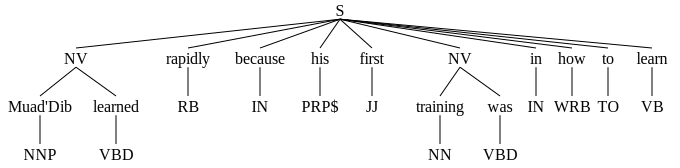

In [ ]:
tree

In [ ]:
for item in tree:
  print(type(item), item)

<class 'nltk.tree.tree.Tree'> (NV Muad'Dib/NNP learned/VBD)
<class 'tuple'> ('rapidly', 'RB')
<class 'tuple'> ('because', 'IN')
<class 'tuple'> ('his', 'PRP$')
<class 'tuple'> ('first', 'JJ')
<class 'nltk.tree.tree.Tree'> (NV training/NN was/VBD)
<class 'tuple'> ('in', 'IN')
<class 'tuple'> ('how', 'WRB')
<class 'tuple'> ('to', 'TO')
<class 'tuple'> ('learn', 'VB')


In [ ]:
for subtree in tree.subtrees(lambda t: t.label()=='NV'):
  subtree.pretty_print()

              NV            
      ________|_______       
Muad'Dib/NNP     learned/VBD

             NV        
      _______|_____     
training/NN     was/VBD



# Розкриття значень слів Word2Vec

[Візуалізація](https://projector.tensorflow.org/)

Word2vec, скорочено від "слово до вектора", - це потужна техніка в обробці природної мови (NLP), яка вивчає змістовне представлення слів у вигляді векторів. Уявіть собі словник, де кожне слово визначається не лише своїм значенням, але й числовим вектором у багатовимірному просторі. Слова зі схожими значеннями матимуть схожі вектори, що дозволяє нам фіксувати семантичні зв'язки між словами.

![](https://images.ctfassets.net/1wryd5vd9xez/3hga69w0xjje4zkJqyEuV2/6d764c23853d735d97158a8fb2f57ae2/https___cdn-images-1.medium.com_max_3696_1_4B4zxpEVSkxGq3FzIbTL4g.png)

**Ключові поняття у Word2Vec:**

* **Безперервний мішок слів (CBOW):** Цей підхід передбачає цільове слово на основі слів, що оточують його в контексті. Модель навчається, коригуючи вектори слів для підвищення точності прогнозування.

* **Скіп-грама:** Цей підхід передбачає навколишні контекстні слова на основі заданого цільового слова. Модель спрямована на пошук контекстних слів з векторами, близькими до вектора цільового слова.

* **Векторний простір:** Word2Vec представляє слова як вектори у високорозмірному просторі. Слова зі схожими значеннями матимуть вектори близько один до одного у цьому просторі.

* **Вимірність:** Кількість вимірів у векторному просторі визначає рівень деталізації представлення слів. Вища вимірність дозволяє відображати більш складні зв'язки, але також вимагає більше навчальних даних та обчислювальних ресурсів.

**Процес навчання:**.

1. **Попередня обробка тексту:** Корпус тексту очищується і попередньо обробляється. Це часто включає видалення стоп-слів, розділових знаків і перетворення тексту в нижній регістр.
2. **Розсувне вікно:** Розсувне вікно ітераційно переміщується над текстом, захоплюючи цільове слово та навколишні слова контексту в межах певного розміру вікна.
3. **Навчання моделі:** На основі обраного підходу (CBOW або Skip-грама) модель обробляє пари слів (цільове слово і слова контексту) і оновлює вектори слів для підвищення точності прогнозування.
4. **Векторне представлення:** Після навчання кожне слово в словнику має вивчене векторне представлення у вибраній розмірності.

**Переваги Word2Vec:**

* **Семантичні зв'язки:** Word2Vec фіксує семантичні зв'язки між словами, що дозволяє виконувати такі завдання, як пошук синонімів, аналогій та схожості слів. (наприклад, "король" відноситься до "королеви", як "чоловік" до "жінки").
* **Зменшення розмірності:** Вектори слів можна використовувати в різних завданнях НЛП. Їхню високу розмірність можна зменшити за допомогою таких методів, як аналіз головних компонент (PCA) для ефективної обробки.
* **Неконтрольоване навчання:** Word2Vec - це метод неконтрольованого навчання, що означає, що йому не потрібні марковані дані для навчання. Це робить його застосовним до великих немаркованих текстових масивів.

**Застосування Word2Vec:**.

* **Машинний переклад:** Вбудовування слів Word2Vec можна використовувати як функції в моделях машинного перекладу для покращення якості перекладу.
* **Класифікація тексту:** Вектори слів можна використовувати як вхідні ознаки для задач класифікації тексту, таких як аналіз настроїв або моделювання тем.
* **Рекомендаційні системи:** Word2Vec може представляти вподобання користувачів та описи товарів у вигляді векторів, що дозволяє рекомендаційним системам пропонувати схожі товари на основі семантичних зв'язків.

**Початок роботи з Word2Vec:**

Реалізацію Word2Vec можна знайти у кількох бібліотеках, зокрема Gensim (Python) та Word2Vec (Google). Ознайомтеся з цими бібліотеками та підручниками, щоб поекспериментувати з Word2Vec на власних текстових даних.

**Пам'ятайте:**

* Word2Vec фіксує статистичні зв'язки між словами, а не ідеальні визначення.
* Якість вбудовування слів залежить від корпусу навчальних даних та обраних параметрів.
* Word2Vec є базовою технікою, а подальші вдосконалення, такі як GloVe, пропонують додаткові функціональні можливості.

Зрозумівши Word2Vec, ви отримаєте цінну інформацію про те, як моделі НЛП фіксують значення слів і взаємозв'язки, прокладаючи шлях до вивчення більш просунутих додатків НЛП.
